In [1]:
#import pandas as pd
import numpy as np
import pandas as pd

#to check the data type
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for visulazation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to build and analyze various statistical models we use"statsmodels"
import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#for multicolineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.utils import resample
#for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#Adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
#Search methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")
#np.set_printoptions(suppress=True)

In [2]:
data= pd.read_csv("C:\\Users\\91934\\Documents\\indiv project\\Student-Employability-Datasets.csv")

#Basic information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name of Student           2982 non-null   object
 1   GENERALAPPEARANCE         2982 non-null   int64 
 2   MANNEROFSPEAKING          2982 non-null   int64 
 3   PHYSICALCONDITION         2982 non-null   int64 
 4   MENTALALERTNESS           2982 non-null   int64 
 5   SELFCONFIDENCE            2982 non-null   int64 
 6   ABILITYTOPRESENTIDEAS     2982 non-null   int64 
 7   COMMUNICATIONSKILLS       2982 non-null   int64 
 8   StudentPerformanceRating  2982 non-null   int64 
 9   CLASS                     2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Name of Student             0
GENERALAPPEARANCE           0
MANNEROFSPEAKING            0
PHYSICALCONDITION           0
MENTALALERTNESS             0
SELFCONFIDENCE              0
ABILITYTOPRESENTIDEAS       0
COMMUNICATIONSKILLS         0
StudentPerformanceRating    0
CLASS                       0
dtype: int64

In [6]:
data.nunique()

Name of Student             2982
GENERALAPPEARANCE              4
MANNEROFSPEAKING               4
PHYSICALCONDITION              4
MENTALALERTNESS                4
SELFCONFIDENCE                 4
ABILITYTOPRESENTIDEAS          4
COMMUNICATIONSKILLS            4
StudentPerformanceRating       3
CLASS                          2
dtype: int64

In [7]:
data.dtypes

Name of Student             object
GENERALAPPEARANCE            int64
MANNEROFSPEAKING             int64
PHYSICALCONDITION            int64
MENTALALERTNESS              int64
SELFCONFIDENCE               int64
ABILITYTOPRESENTIDEAS        int64
COMMUNICATIONSKILLS          int64
StudentPerformanceRating     int64
CLASS                       object
dtype: object

In [8]:
data.describe()

,GENERALAPPEARANCE,MANNEROFSPEAKING,PHYSICALCONDITION,MENTALALERTNESS,SELFCONFIDENCE,ABILITYTOPRESENTIDEAS,COMMUNICATIONSKILLS,StudentPerformanceRating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
data.describe(include=object)

,Name of Student,CLASS
count,2982,2982
unique,2982,2
top,Student 1,Employable
freq,1,1729


In [10]:
le=LabelEncoder()
data["CLASS"]=le.fit_transform(data["CLASS"])
data.CLASS.value_counts()

0    1729
1    1253
Name: CLASS, dtype: int64

In [11]:
data.shape

(2982, 10)

In [12]:
#filter the continous data
data_numeric=data.select_dtypes(include=np.number)
data_numeric

,GENERALAPPEARANCE,MANNEROFSPEAKING,PHYSICALCONDITION,MENTALALERTNESS,SELFCONFIDENCE,ABILITYTOPRESENTIDEAS,COMMUNICATIONSKILLS,StudentPerformanceRating,CLASS
0,4,5,4,5,5,5,5,5,0
1,4,4,4,4,4,4,3,5,0
2,4,3,3,3,3,3,2,5,1
3,3,3,3,2,3,3,3,5,1
4,4,4,3,3,4,4,3,5,0
...,...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5,0
2978,3,4,4,4,4,4,4,5,0
2979,4,5,4,5,4,4,4,5,0
2980,4,4,4,3,4,4,3,5,1


In [13]:
data_numeric.columns

Index(['GENERALAPPEARANCE', 'MANNEROFSPEAKING', 'PHYSICALCONDITION',
       'MENTALALERTNESS', 'SELFCONFIDENCE', 'ABILITYTOPRESENTIDEAS',
       'COMMUNICATIONSKILLS', 'StudentPerformanceRating', 'CLASS'],
      dtype='object')

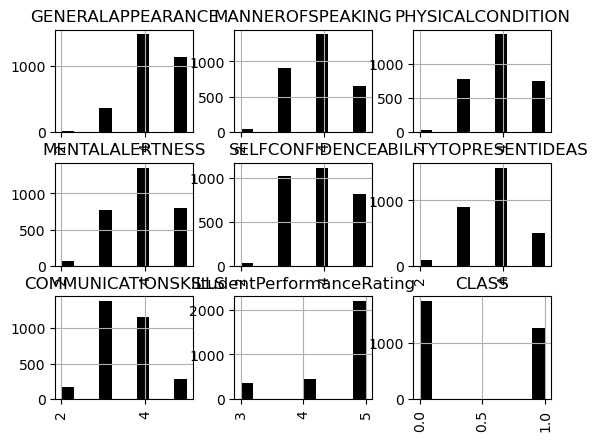

In [14]:
figsize=(30,20)
data_numeric.hist(xrot=90,color="black")
plt.show()

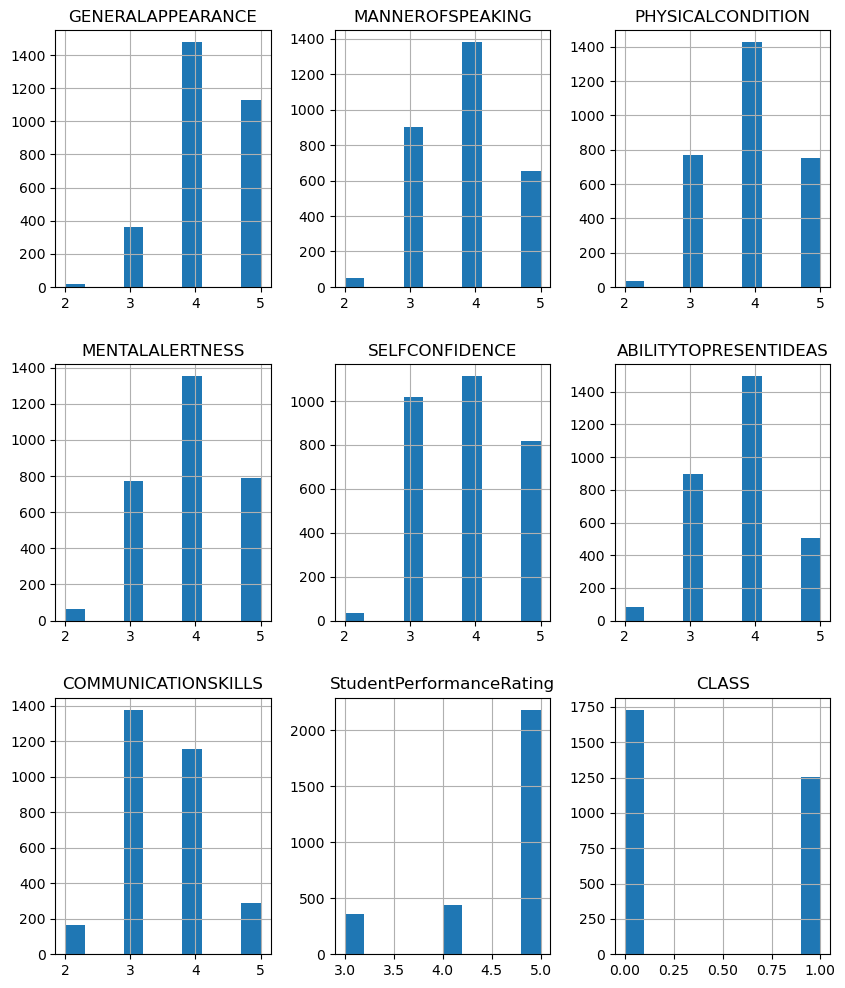

In [15]:
data_numeric.hist(bins=10,figsize=(10,12))
plt.show()

In [16]:
data_numeric.columns

Index(['GENERALAPPEARANCE', 'MANNEROFSPEAKING', 'PHYSICALCONDITION',
       'MENTALALERTNESS', 'SELFCONFIDENCE', 'ABILITYTOPRESENTIDEAS',
       'COMMUNICATIONSKILLS', 'StudentPerformanceRating', 'CLASS'],
      dtype='object')

<AxesSubplot:xlabel='StudentPerformanceRating'>

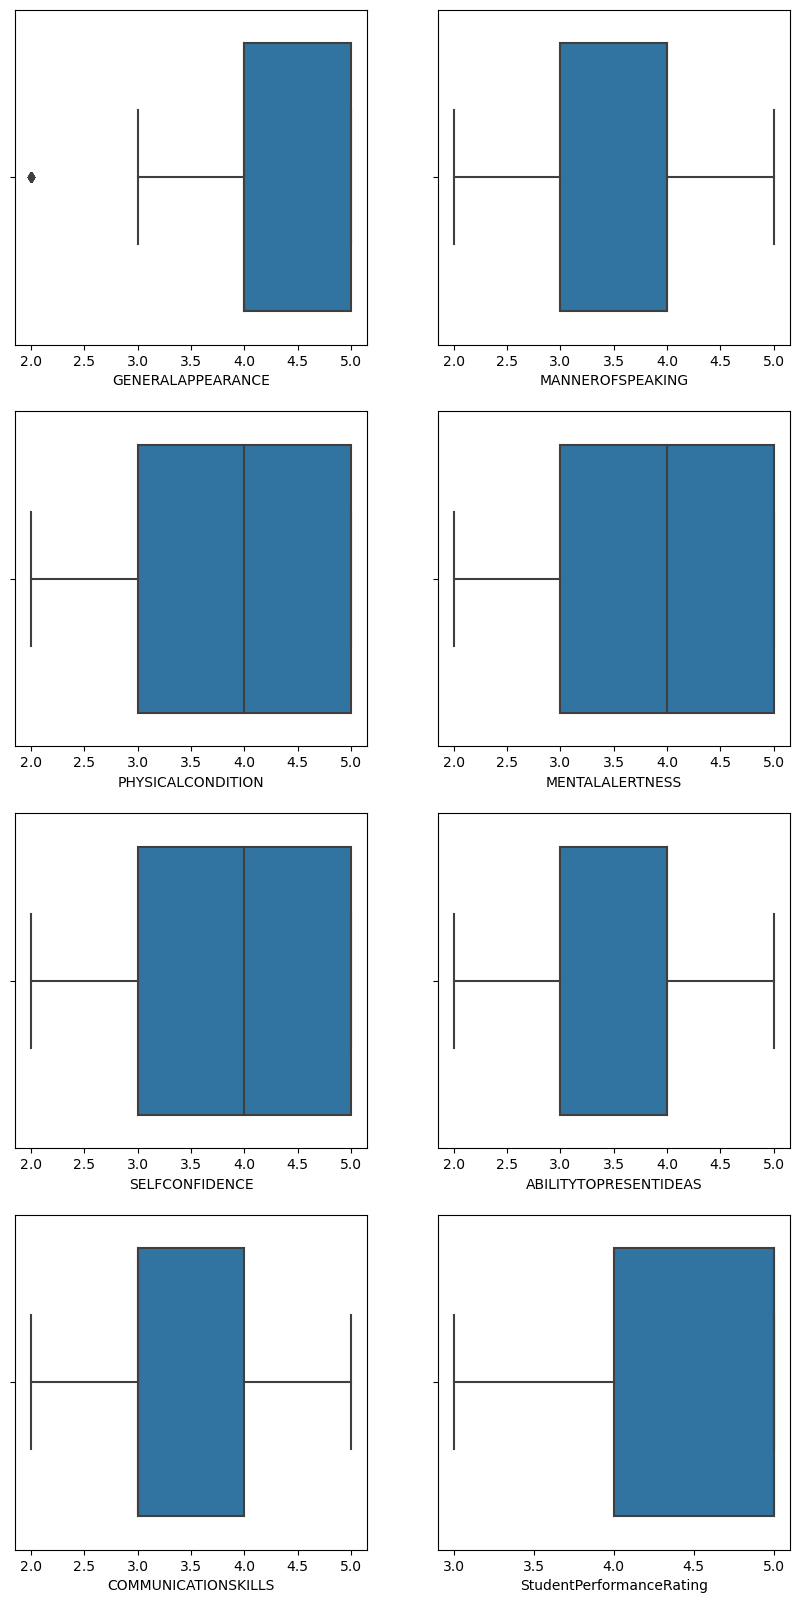

In [17]:
fig, axarr  = plt.subplots(4,2,figsize=(10,20))
sns.boxplot(x=data['GENERALAPPEARANCE'],ax=axarr[0,0])
sns.boxplot(x=data['MANNEROFSPEAKING'],ax=axarr[0,1])
sns.boxplot(x=data['PHYSICALCONDITION'],ax=axarr[1,0])
sns.boxplot(x=data['MENTALALERTNESS'],ax=axarr[1,1])
sns.boxplot(x=data['SELFCONFIDENCE'],ax=axarr[2,0])
sns.boxplot(x=data['ABILITYTOPRESENTIDEAS'],ax=axarr[2,1])
sns.boxplot(x=data['COMMUNICATIONSKILLS'],ax=axarr[3,0])
sns.boxplot(x=data['StudentPerformanceRating'],ax=axarr[3,1])

# statical test for continous data

In [18]:
data['CLASS']=data['CLASS'].astype("int")

In [19]:
data_numeric.columns

Index(['GENERALAPPEARANCE', 'MANNEROFSPEAKING', 'PHYSICALCONDITION',
       'MENTALALERTNESS', 'SELFCONFIDENCE', 'ABILITYTOPRESENTIDEAS',
       'COMMUNICATIONSKILLS', 'StudentPerformanceRating', 'CLASS'],
      dtype='object')

In [20]:
model = ols('CLASS~GENERALAPPEARANCE',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
GENERALAPPEARANCE,1.0,9.8488,9.8488,40.9534,0.0
Residual,2980.0,716.6559,0.2405,NaN,NaN


In [21]:
model = ols('CLASS~GENERALAPPEARANCE',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
GENERALAPPEARANCE,1.0,9.8488,9.8488,40.9534,0.0
Residual,2980.0,716.6559,0.2405,NaN,NaN


In [22]:
model = ols('CLASS~MANNEROFSPEAKING',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
MANNEROFSPEAKING,1.0,28.4494,28.4494,121.4506,0.0
Residual,2980.0,698.0553,0.2342,NaN,NaN


In [23]:
model = ols('CLASS~PHYSICALCONDITION',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
PHYSICALCONDITION,1.0,19.6553,19.6553,82.8646,0.0
Residual,2980.0,706.8494,0.2372,NaN,NaN


In [24]:
model = ols('CLASS~MENTALALERTNESS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
MENTALALERTNESS,1.0,29.8741,29.8741,127.7933,0.0
Residual,2980.0,696.6306,0.2338,NaN,NaN


In [25]:
model = ols('CLASS~SELFCONFIDENCE',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
SELFCONFIDENCE,1.0,14.5563,14.5563,60.9281,0.0
Residual,2980.0,711.9484,0.2389,NaN,NaN


In [26]:
model = ols('CLASS~ABILITYTOPRESENTIDEAS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
ABILITYTOPRESENTIDEAS,1.0,10.0213,10.0213,41.6806,0.0
Residual,2980.0,716.4834,0.2404,NaN,NaN


In [27]:
model = ols('CLASS~COMMUNICATIONSKILLS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
COMMUNICATIONSKILLS,1.0,12.8223,12.8223,53.5397,0.0
Residual,2980.0,713.6824,0.2395,NaN,NaN


In [28]:
model = ols('CLASS~StudentPerformanceRating',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
StudentPerformanceRating,1.0,0.0005,0.0005,0.002,0.9642
Residual,2980.0,726.5042,0.2438,NaN,NaN


In [29]:
data.drop(columns= ['StudentPerformanceRating','Name of Student'], axis= 1, inplace= True)

In [30]:
data['CLASS']=data['CLASS'].astype("O")

# multicolinearity

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENERALAPPEARANCE      2982 non-null   int64 
 1   MANNEROFSPEAKING       2982 non-null   int64 
 2   PHYSICALCONDITION      2982 non-null   int64 
 3   MENTALALERTNESS        2982 non-null   int64 
 4   SELFCONFIDENCE         2982 non-null   int64 
 5   ABILITYTOPRESENTIDEAS  2982 non-null   int64 
 6   COMMUNICATIONSKILLS    2982 non-null   int64 
 7   CLASS                  2982 non-null   object
dtypes: int64(7), object(1)
memory usage: 186.5+ KB


In [32]:
x=data.iloc[:,[0,1,2,3,4,5,6]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [33]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

                 feature        VIF
0      GENERALAPPEARANCE   1.440005
1       MANNEROFSPEAKING   2.446138
2      PHYSICALCONDITION   2.150431
3        MENTALALERTNESS   2.667870
4         SELFCONFIDENCE   2.385598
5  ABILITYTOPRESENTIDEAS   2.726436
6    COMMUNICATIONSKILLS   2.125356
7              intersept  52.122374


<AxesSubplot:>

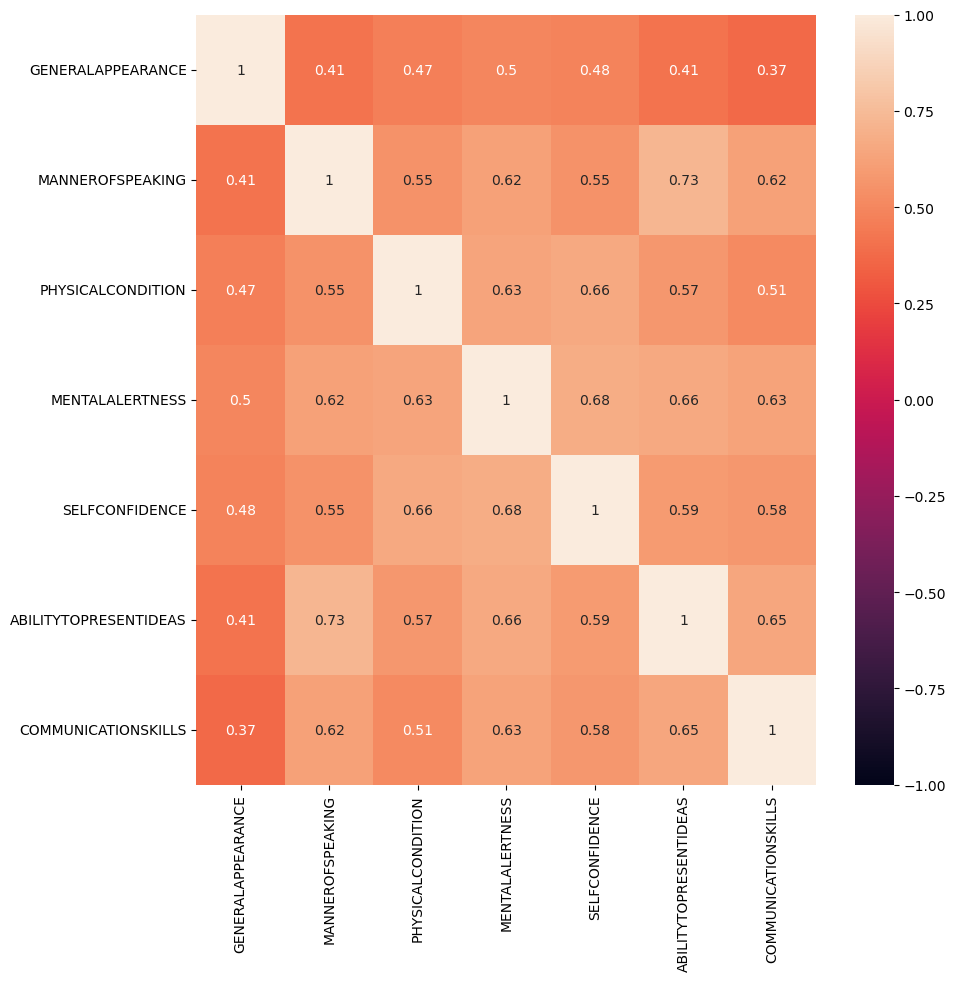

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)

In [35]:
data.cov()

,GENERALAPPEARANCE,MANNEROFSPEAKING,PHYSICALCONDITION,MENTALALERTNESS,SELFCONFIDENCE,ABILITYTOPRESENTIDEAS,COMMUNICATIONSKILLS
GENERALAPPEARANCE,0.460364,0.208958,0.236661,0.263132,0.263218,0.203952,0.187267
MANNEROFSPEAKING,0.208958,0.573068,0.310441,0.365379,0.335899,0.406567,0.350811
PHYSICALCONDITION,0.236661,0.310441,0.553737,0.369309,0.398724,0.313838,0.284339
MENTALALERTNESS,0.263132,0.365379,0.369309,0.611496,0.426400,0.382872,0.366766
SELFCONFIDENCE,0.263218,0.335899,0.398724,0.426400,0.652222,0.351054,0.346789
ABILITYTOPRESENTIDEAS,0.203952,0.406567,0.313838,0.382872,0.351054,0.546697,0.356137
COMMUNICATIONSKILLS,0.187267,0.350811,0.284339,0.366766,0.346789,0.356137,0.553359


In [36]:
data.corr()

,GENERALAPPEARANCE,MANNEROFSPEAKING,PHYSICALCONDITION,MENTALALERTNESS,SELFCONFIDENCE,ABILITYTOPRESENTIDEAS,COMMUNICATIONSKILLS
GENERALAPPEARANCE,1.000000,0.406823,0.468731,0.495937,0.480360,0.406541,0.371028
MANNEROFSPEAKING,0.406823,1.000000,0.551092,0.617226,0.549424,0.726366,0.622969
PHYSICALCONDITION,0.468731,0.551092,1.000000,0.634661,0.663473,0.570402,0.513667
MENTALALERTNESS,0.495937,0.617226,0.634661,1.000000,0.675185,0.662191,0.630505
SELFCONFIDENCE,0.480360,0.549424,0.663473,0.675185,1.000000,0.587900,0.577251
ABILITYTOPRESENTIDEAS,0.406541,0.726366,0.570402,0.662191,0.587900,1.000000,0.647501
COMMUNICATIONSKILLS,0.371028,0.622969,0.513667,0.630505,0.577251,0.647501,1.000000


# visulazation for categorical data

In [37]:
data.describe(include=object)

,CLASS
count,2982
unique,2
top,0
freq,1729


In [38]:
data.CLASS.value_counts()

0    1729
1    1253
Name: CLASS, dtype: int64

Text(0.5, 1.0, 'Barplot of CLASS')

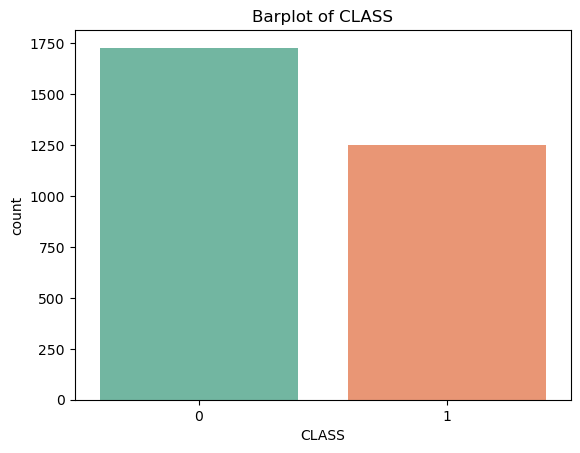

In [39]:
sns.countplot(x = 'CLASS', data=data, palette ='Set2')
plt.title('Barplot of CLASS')

In [40]:
data['CLASS']=data['CLASS'].astype("int")

# Logistic regression

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENERALAPPEARANCE      2982 non-null   int64
 1   MANNEROFSPEAKING       2982 non-null   int64
 2   PHYSICALCONDITION      2982 non-null   int64
 3   MENTALALERTNESS        2982 non-null   int64
 4   SELFCONFIDENCE         2982 non-null   int64
 5   ABILITYTOPRESENTIDEAS  2982 non-null   int64
 6   COMMUNICATIONSKILLS    2982 non-null   int64
 7   CLASS                  2982 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 174.9 KB


In [42]:
data.columns

Index(['GENERALAPPEARANCE', 'MANNEROFSPEAKING', 'PHYSICALCONDITION',
       'MENTALALERTNESS', 'SELFCONFIDENCE', 'ABILITYTOPRESENTIDEAS',
       'COMMUNICATIONSKILLS', 'CLASS'],
      dtype='object')

In [43]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [44]:
#model=LogisticRegression(fit_intercept=True,class_weight=None, random_state=None, solver='lbfgs', max_iter=100,)
#model1=model.fit(x,y)

In [45]:
# model1.intercept_

In [46]:
#model1.coef_

In [47]:
#y_pred=model1.predict(x)
#y_pred

In [48]:
#cm=metrics=confusion_matrix(y,y_pred)
#cm

In [49]:
#Logistic_regression_method=model1.score(x,y)
#Logistic_regression_method

In [50]:
#print(classification_report(y,y_pred))

In [51]:
# roc curve
#y_pred_prob=model1.predict_proba(x)
#fpr1,tpr1,threshold=roc_curve(y,y_pred_prob[:,1])
#roc_auc1=auc(fpr1,tpr1)
#print(roc_auc1)

In [52]:
#roc curve
#plt.title("ROC curve for logreg")
#plt.xlabel("fpr(1-specificity)")
#plt.xlabel("tpr(senstivity)")

#plt.plot([0,1],[0,1],'r--')
#plt.xlim([0,1])
#plt.ylim([0,1])
#plt.plot(fpr1,tpr1,label="AUC="+str(roc_auc1))
#plt.legend(loc=4)
#plt.show()

In [53]:
#testing model

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [57]:
model2=LogisticRegression(class_weight=None, random_state=None, solver='lbfgs', max_iter=100)

In [58]:
model2=model2.fit(x_train,y_train)

In [59]:
model2.intercept_

array([2.15260228])

In [60]:
model2.coef_

array([[-0.00798435, -0.54818441, -0.1096208 , -0.4782823 ,  0.04628649,
         0.43493148,  0.03749808]])

In [61]:
y_pred=model2.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [62]:
cm=metrics=confusion_matrix(y_test,y_pred)
cm

array([[260,  72],
       [170,  95]], dtype=int64)

In [64]:
Test_Train_method=model2.score(x_test,y_test)
Test_Train_method

0.5946398659966499

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68       332
           1       0.57      0.36      0.44       265

    accuracy                           0.59       597
   macro avg       0.59      0.57      0.56       597
weighted avg       0.59      0.59      0.57       597



In [67]:
# roc curve
y_pred_prob=model2.predict_proba(x_test)
fpr2,tpr2,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print(roc_auc2)

0.6400716071834508


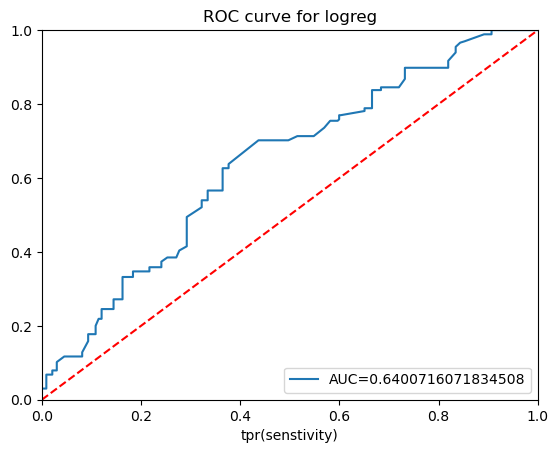

In [68]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr2,tpr2,label="AUC="+str(roc_auc2))
plt.legend(loc=4)
plt.show()

In [ ]:
#model -3 using glm method

In [69]:
data.columns

Index(['GENERALAPPEARANCE', 'MANNEROFSPEAKING', 'PHYSICALCONDITION',
       'MENTALALERTNESS', 'SELFCONFIDENCE', 'ABILITYTOPRESENTIDEAS',
       'COMMUNICATIONSKILLS', 'CLASS'],
      dtype='object')

In [70]:
model2=smf.glm(formula='CLASS ~GENERALAPPEARANCE+MANNEROFSPEAKING+PHYSICALCONDITION+MENTALALERTNESS+SELFCONFIDENCE+ABILITYTOPRESENTIDEAS+COMMUNICATIONSKILLS', 
               data=data,family=sm.families.Binomial())
result=model2.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                 2982
Model:                            GLM   Df Residuals:                     2974
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1938.5
Date:                Wed, 18 Jan 2023   Deviance:                       3876.9
Time:                        15:23:25   Pearson chi2:                 2.96e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05879
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.29

In [71]:
model3=smf.glm(formula='CLASS~MANNEROFSPEAKING+PHYSICALCONDITION+MENTALALERTNESS+ABILITYTOPRESENTIDEAS', 
               data=data,family=sm.families.Binomial())
result1=model3.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                 2982
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1939.0
Date:                Wed, 18 Jan 2023   Deviance:                       3877.9
Time:                        15:23:26   Pearson chi2:                 2.96e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05848
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.28

In [72]:
predictions3=result1.predict()
predictions3

array([0.29765016, 0.41473043, 0.57789724, ..., 0.2151754 , 0.52167989,
       0.41473043])

In [73]:
predictions_nominal3=[0 if x<0.5 else 1 for x in predictions3]

In [74]:
fpr3,tpr3,threshold3=roc_curve(y,predictions3)
roc_auc3=auc(fpr3,tpr3)
print(roc_auc3)

0.6304928322402173


In [75]:
print(classification_report(y,predictions_nominal3))

              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1729
           1       0.55      0.38      0.45      1253

    accuracy                           0.61      2982
   macro avg       0.59      0.58      0.57      2982
weighted avg       0.60      0.61      0.59      2982



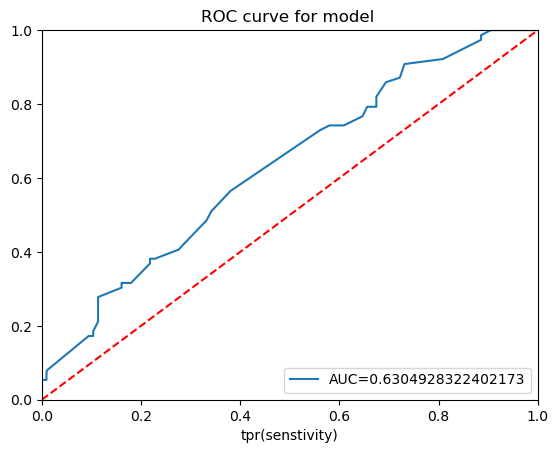

In [76]:
#roc curve
plt.title("ROC curve for model ")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3,tpr3,label="AUC="+str(roc_auc3))
plt.legend(loc=4)
plt.show()

In [77]:
# DECISION TREE 

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [79]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [80]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.20, random_state = 1)

In [81]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2385, 7) (597, 7) (2385,) (597,)


In [82]:
clf = tree.DecisionTreeClassifier(criterion="entropy",splitter="best",random_state=40)

In [83]:
model4=clf.fit(x_train,y_train)

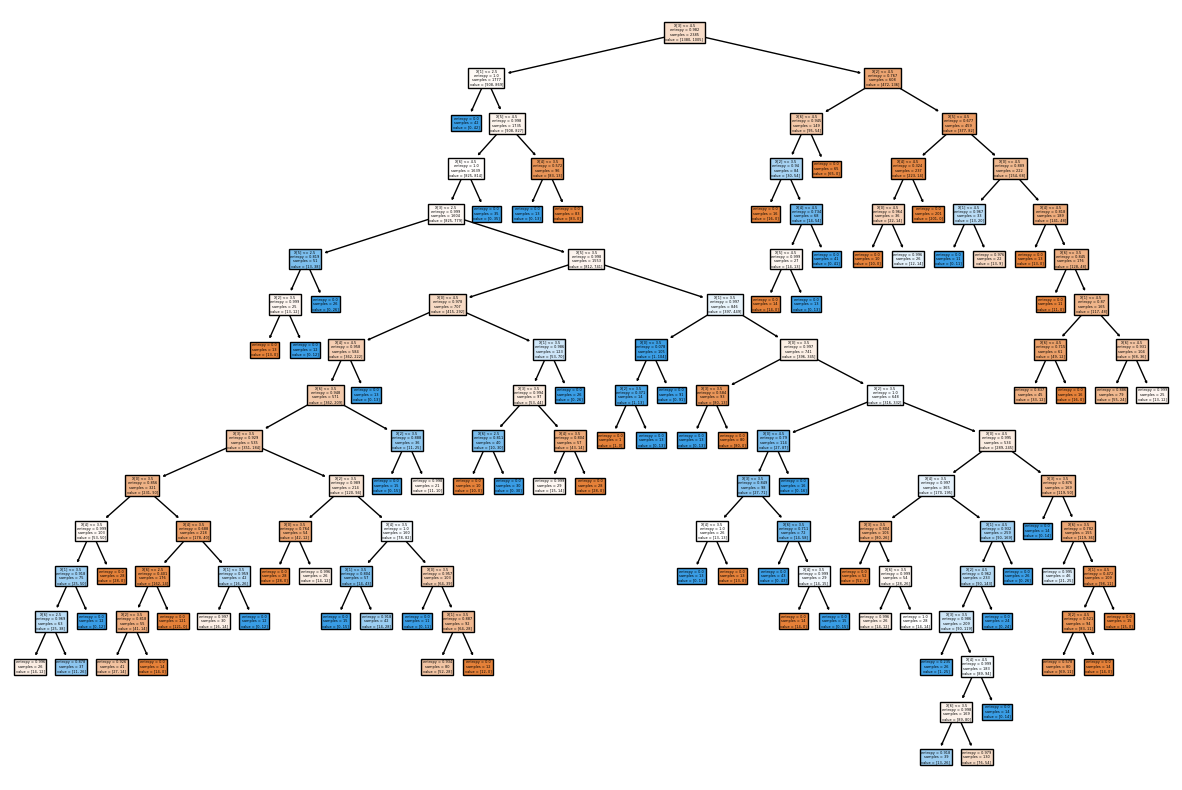

In [84]:
plt.figure(figsize=(15,10))
a = plot_tree(model4,filled=True)
plt.show()

In [85]:
model4.get_depth()

16

In [86]:
print(model4.feature_importances_)

[0.09820331 0.15115402 0.09772119 0.1790058  0.23246184 0.08772891
 0.15372494]


In [87]:
depth = [1,2,3,4,5,6,7,8]

accuracy_train,accuracy_test= [],[]

for i in depth:
    tree = DecisionTreeClassifier(max_depth= i, random_state=50)
    
    tree.fit(x_train, y_train)
    y_train_pred1=tree.predict(x_train)
    y_test_pred1=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred1))
    accuracy_test.append(accuracy_score(y_test, y_test_pred1))

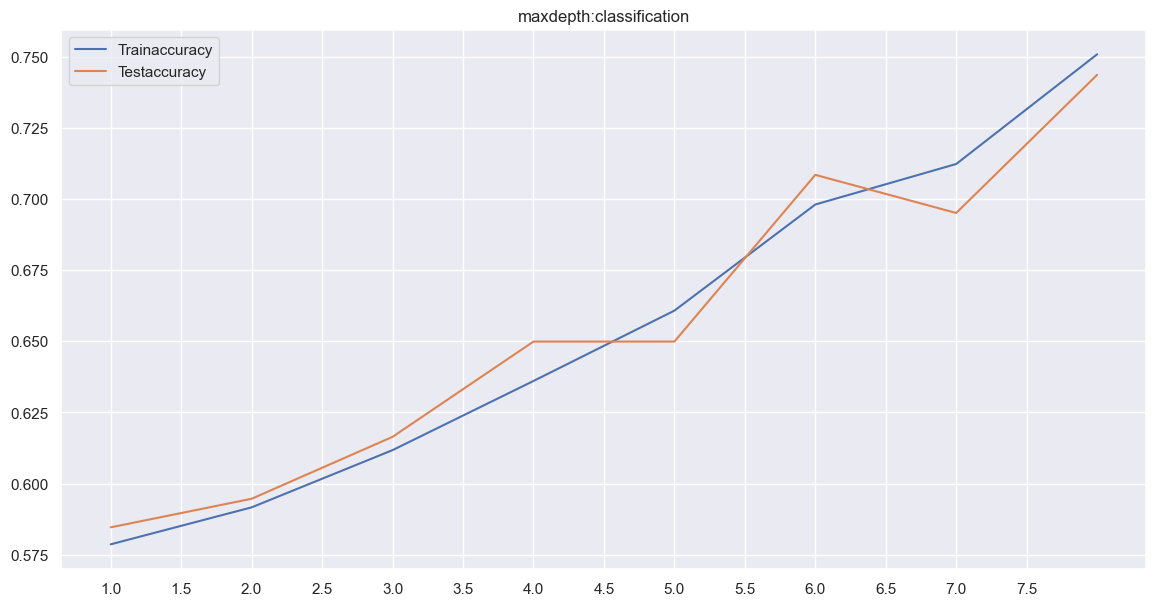

In [88]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train,x = depth, label = 'Trainaccuracy')
sns.lineplot(y=accuracy_test, x = depth, label = 'Testaccuracy')
plt.title("maxdepth:classification")
plt.xticks(ticks=np.arange(1,8,0.5))
plt.show()

In [89]:
model4= DecisionTreeClassifier(max_depth=4, random_state=50)    
model4.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=50)

In [90]:
y_train_pred2=model4.predict(x_train)
y_train_pred2

array([0, 0, 0, ..., 0, 0, 1])

In [91]:
y_test_pred2=model4.predict(x_test)
y_test_pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
accuracytrain=(accuracy_score(y_train, y_train_pred2))
accuracytrain

0.6360587002096436

In [93]:
Decision_tree=(accuracy_score(y_test, y_test_pred2))
Decision_tree

0.6499162479061976

In [94]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       349
           1       0.87      0.19      0.31       248

    accuracy                           0.65       597
   macro avg       0.75      0.58      0.54       597
weighted avg       0.73      0.65      0.57       597



In [95]:
# roc curve
y_pred_prob=model4.predict_proba(x_test)
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.7291281541732139


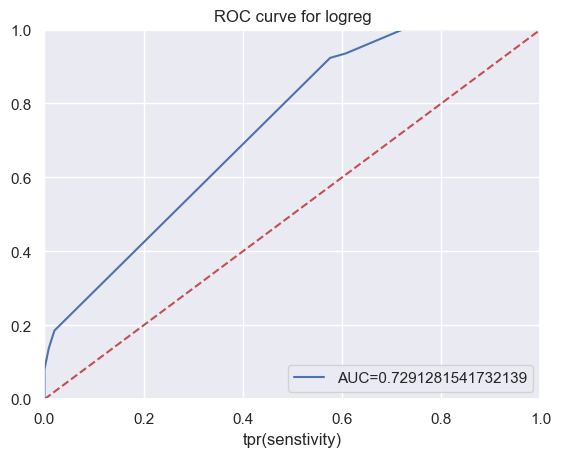

In [96]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

In [97]:
#Randoam forest

In [98]:
model5= RandomForestClassifier(n_estimators =100, max_depth = 4, random_state = 0 )
model5

RandomForestClassifier(max_depth=4, random_state=0)

In [99]:
model5.fit(x_train,y_train)
model5

RandomForestClassifier(max_depth=4, random_state=0)

In [100]:
y_pred= model5.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,331,18,349
1,149,99,248
All,480,117,597


In [102]:
confusion_matrix(y_test,y_pred)

array([[331,  18],
       [149,  99]], dtype=int64)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       349
           1       0.85      0.40      0.54       248

    accuracy                           0.72       597
   macro avg       0.77      0.67      0.67       597
weighted avg       0.75      0.72      0.69       597



In [104]:
Random_forest=(accuracy_score(y_test, y_pred))
Random_forest

0.7202680067001676

In [105]:
# roc curve
y_pred_prob=model5.predict_proba(x_test)
fpr5,tpr5,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc5=auc(fpr5,tpr5)
print(roc_auc5)

0.7941584249930678


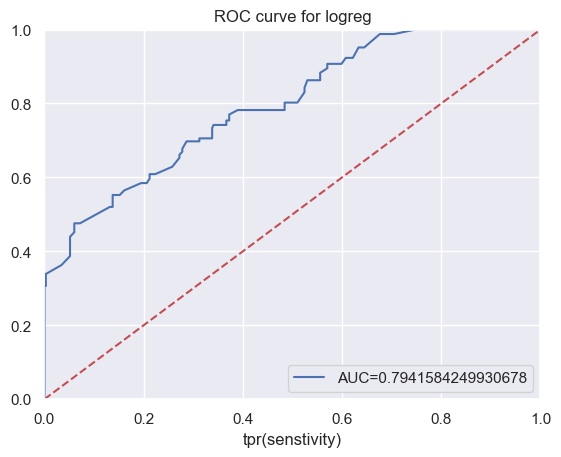

In [106]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr5,tpr5,label="AUC="+str(roc_auc5))
plt.legend(loc=4)
plt.show()

In [107]:
#randoam forest  using grid search

In [108]:
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              'max_features': ['auto', 'log2'],
              'n_estimators': [25,50,100,150,200]}

In [109]:
rfc= RandomForestClassifier(random_state = 1)
rfc

RandomForestClassifier(random_state=1)

In [110]:
g_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

In [ ]:
model6= g_search.fit(x_train,y_train)

In [ ]:
print(model6.best_params_)

In [ ]:
y_pred= model6.predict(x_test)
y_pred

In [ ]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
ramdoam_forest_gs=(accuracy_score(y_test, y_pred))
ramdoam_forest_gs

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# roc curve
y_pred_prob=model6.predict_proba(x_test)
fpr6,tpr6,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc6=auc(fpr6,tpr6)
print(roc_auc6)

In [ ]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr6,tpr6,label="AUC="+str(roc_auc6))
plt.legend(loc=4)
plt.show()

In [ ]:
#random forest using Randomized serch

In [ ]:
rfr= RandomizedSearchCV(estimator = rfc,
                                param_distributions = param_grid,
                                n_iter = 20, cv= 3, random_state =421)

In [ ]:
model7= rfr.fit(x_train,y_train)

In [ ]:
print(model7.best_params_)

In [ ]:
y_pred= model7.predict(x_test)
y_pred

In [ ]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
ramdoam_forest_rs=(accuracy_score(y_test, y_pred))
ramdoam_forest_rs

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# roc curve
y_pred_prob=model7.predict_proba(x_test)
fpr7,tpr7,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc7=auc(fpr7,tpr7)
print(roc_auc7)

In [ ]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr7,tpr7,label="AUC="+str(roc_auc7))
plt.legend(loc=4)
plt.show()

In [ ]:
#gradient Boosting classifier

In [ ]:
model8= GradientBoostingClassifier(max_depth=4,n_estimators =50,learning_rate=1.0,random_state=0)
model8

In [ ]:
model8 = model8.fit(x_train,y_train)
model8

In [ ]:
y_predGB=model8.predict(x_test)
print(y_predGB)

In [ ]:
pd.crosstab(y_test,y_predGB,margins=True,rownames=['Actual'],colnames=['preddict'])

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
gradient_boosting_classifier=(accuracy_score(y_test,y_predGB))
gradient_boosting_classifier

In [ ]:
print(classification_report(y_test,y_predGB))

In [ ]:
# roc curve
y_pred_prob=model8.predict_proba(x_test)
fpr8,tpr8,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc8=auc(fpr8,tpr8)
print(roc_auc8)

In [ ]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr8,tpr8,label="AUC="+str(roc_auc8))
plt.legend(loc=4)
plt.show()

In [ ]:
#Adaptive boosting

In [ ]:
model9= AdaBoostClassifier(n_estimators =50,learning_rate=1.0,random_state=0 )
model9

In [ ]:
model9= model9.fit(x_train,y_train)
model9

In [ ]:
y_pred=model9.predict(x_test)
print(y_pred)

In [ ]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
adaptive_boosting=(accuracy_score(y_test, y_pred))
adaptive_boosting

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# roc curve
y_pred_prob=model9.predict_proba(x_test)
fpr9,tpr9,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc9=auc(fpr9,tpr9)
print(roc_auc9)

In [ ]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr9,tpr9,label="AUC="+str(roc_auc9))
plt.legend(loc=4)
plt.show()

In [ ]:
#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0,
                        max_features=1.0, bootstrap=True, bootstrap_features=False,
                        oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [ ]:
model10=model.fit(x_train,y_train)

In [ ]:
y_pred=model10.predict(x_test)
y_pred

In [ ]:
pd.crosstab(y_test,y_pred,margins=True)

In [ ]:
bagging_classifier=accuracy_score(y_test,y_pred)
bagging_classifier

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# roc curve
y_pred_prob=model10.predict_proba(x_test)
fpr10,tpr10,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc10=auc(fpr10,tpr10)
print(roc_auc10)

In [ ]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr10,tpr10,label="AUC="+str(roc_auc10))
plt.legend(loc=4)
plt.show()

In [ ]:
#Knn neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='ball_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [ ]:
#model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [ ]:
#model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='brute',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [ ]:
model11=model.fit(x_train,y_train)

In [ ]:
y_pred=model11.predict(x_test)
y_pred

In [ ]:
pd.crosstab(y_test,y_pred,margins=True)

In [ ]:
Knn_neighbour=accuracy_score(y_test,y_pred)
Knn_neighbour

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# roc curve
y_pred_prob=model4.predict_proba(x_test)
fpr11,tpr11,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc11=auc(fpr11,tpr11)
print(roc_auc11)

In [ ]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr11,tpr11,label="AUC="+str(roc_auc11))
plt.legend(loc=4)
plt.show()

In [ ]:
#naive Bayes classifier

In [ ]:
model12=GaussianNB()

In [ ]:
model12=model12.fit(x_train,y_train)

In [ ]:
y_pred=model12.predict(x_test)
y_pred

In [ ]:
pd.crosstab(y_test,y_pred,margins=True)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
Naive_Bayes_classifier=accuracy_score(y_test,y_pred)
Naive_Bayes_classifier

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# roc curve
y_pred_prob=model12.predict_proba(x_test)
fpr12,tpr12,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc12=auc(fpr12,tpr12)
print(roc_auc12)

In [ ]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr12,tpr12,label="AUC="+str(roc_auc12))
plt.legend(loc=4)
plt.show()

In [ ]:
print('Accuracy for Logistic regression method:',Logistic_regression_method*100)
print('Accuracy for TestTrain-Logistic regression method:', Test_Train_method*100)
print('Accuracy for Decision_tree method:',Decision_tree*100)
print('Accuracy for Random forest method:', Random_forest*100)
print('Accuracy for Random forest_Gridsearch method:', ramdoam_forest_gs*100)
print('Accuracy for Random forest_Randomsearch:',ramdoam_forest_rs*100)
print('Accuracy for Gradient_boosting_classifier:',gradient_boosting_classifier*100)
print('Accuracy for Naive_Bayes_classifier:', Naive_Bayes_classifier*100)
print('Accuracy for Adaptive_boosting_classifier:',adaptive_boosting*100)
print('Accuracy for bagging_classifier:',bagging_classifier*100)
print('Accuracy for Naive_Bayes_classifier:',Naive_Bayes_classifier*100)
print('Accuracy forKnn_neighbour_classifier :',Knn_neighbour*100)